<img src="CustomerLifetimeValue.png">

# Customer Lifetime Value Analysis

## Introduction

## About the Dataset

### Importing Important Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [105]:
original_data=pd.read_excel("Ecommerce_business.xlsx")

In [106]:
df=original_data.copy()
df.head()

Invoice_No Item_Code                          lower_floor  \
0     536365    85123A   white hanging heart t-light holder   
1     536365     71053                  white metal lantern   
2     536365    84406B       cream cupid hearts coat hanger   
3     536365    84029G  knitted union flag hot water bottle   
4     536365    84029E       red woolly hottie white heart.   

                      Item_Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  
0       2.55     17850.0  United Kingdom  
1       3.39     17850.0  United Kingdom  
2       2.75     17850.0  United Kingdom  
3       3.39     17850.0  United Kingdom  
4       3.39     17850.0  United Kingdom

### Informataion about the columns of the dataset..

### Exploratory Data Analysis

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice_No        541909 non-null  object        
 1   Item_Code         541909 non-null  object        
 2   lower_floor       1816 non-null    object        
 3   Item_Description  540455 non-null  object        
 4   Quantity          541909 non-null  int64         
 5   InvoiceDate       541909 non-null  datetime64[ns]
 6   UnitPrice         541909 non-null  float64       
 7   CustomerID        406829 non-null  float64       
 8   Country           541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [108]:
# checking for null values
df.isnull().sum()

Invoice_No               0
Item_Code                0
lower_floor         540093
Item_Description      1454
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
dtype: int64

# FIRST PROBLEM STATEMENT:- CUSTOMER SEGREGATION ON BASIS OF BUYING PATTERN( RFM- Recency, Frequency,Monetary)

In [ ]:
# Droping the "Item_Code","lower_floor","Item_Description","Country" columns because they are not required in RFM analysis..

In [109]:
df1=df.drop(["Item_Code","lower_floor","Item_Description","Country"],axis=1)

In [110]:
df1.head(10)

Invoice_No  Quantity         InvoiceDate  UnitPrice  CustomerID
0     536365         6 2010-12-01 08:26:00       2.55     17850.0
1     536365         6 2010-12-01 08:26:00       3.39     17850.0
2     536365         8 2010-12-01 08:26:00       2.75     17850.0
3     536365         6 2010-12-01 08:26:00       3.39     17850.0
4     536365         6 2010-12-01 08:26:00       3.39     17850.0
5     536365         2 2010-12-01 08:26:00       7.65     17850.0
6     536365         6 2010-12-01 08:26:00       4.25     17850.0
7     536366         6 2010-12-01 08:28:00       1.85     17850.0
8     536366         6 2010-12-01 08:28:00       1.85     17850.0
9     536367        32 2010-12-01 08:34:00       1.69     13047.0

In [111]:
df1.isnull().sum()

Invoice_No          0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [112]:
df1.dropna(inplace=True)   # dropping the null value

In [113]:
df1.shape

(406829, 5)

In [114]:
df1.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [115]:
df1.describe().T

count          mean          std      min       25%       50%  \
Quantity    406829.0     12.061303   248.693370 -80995.0      2.00      5.00   
UnitPrice   406829.0      3.460471    69.315162      0.0      1.25      1.95   
CustomerID  406829.0  15287.690570  1713.600303  12346.0  13953.00  15152.00   

                 75%      max  
Quantity       12.00  80995.0  
UnitPrice       3.75  38970.0  
CustomerID  16791.00  18287.0

In [117]:
# Negetive indicates that customer purchased someting but they returned that thing
# 0.0  Beacause of free item they have picked

In [119]:
df1[df1["UnitPrice"]==0].head(10)

Invoice_No  Quantity         InvoiceDate  UnitPrice  CustomerID
9302       537197         1 2010-12-05 14:02:00        0.0     12647.0
33576      539263         4 2010-12-16 14:36:00        0.0     16560.0
40089      539722        10 2010-12-21 13:45:00        0.0     14911.0
47068      540372        24 2011-01-06 16:41:00        0.0     13081.0
47070      540372        24 2011-01-06 16:41:00        0.0     13081.0
56674      541109         1 2011-01-13 15:10:00        0.0     15107.0
86789      543599        16 2011-02-10 13:08:00        0.0     17560.0
130188     547417        36 2011-03-23 10:25:00        0.0     13239.0
139453     548318         5 2011-03-30 12:45:00        0.0     13113.0
145208     548871         2 2011-04-04 14:42:00        0.0     14410.0

In [120]:
df1[df1["UnitPrice"]==0]["UnitPrice"]

9302      0.0
33576     0.0
40089     0.0
47068     0.0
47070     0.0
56674     0.0
86789     0.0
130188    0.0
139453    0.0
145208    0.0
157042    0.0
187613    0.0
198383    0.0
279324    0.0
282912    0.0
285657    0.0
298054    0.0
314745    0.0
314746    0.0
314747    0.0
314748    0.0
358655    0.0
361825    0.0
379913    0.0
395529    0.0
420404    0.0
436428    0.0
436597    0.0
436961    0.0
439361    0.0
446125    0.0
446793    0.0
446794    0.0
454463    0.0
454464    0.0
479079    0.0
479546    0.0
480649    0.0
485985    0.0
502122    0.0
Name: UnitPrice, dtype: float64

In [121]:
#just discarding the return items only 
df1=df1[df1["Quantity"]>0]

In [122]:
df1.shape

(397924, 5)

In [124]:
df1.describe().T

count          mean          std      min       25%       50%  \
Quantity    397924.0     13.021823   180.420210      1.0      2.00      6.00   
UnitPrice   397924.0      3.116174    22.096788      0.0      1.25      1.95   
CustomerID  397924.0  15294.315171  1713.169877  12346.0  13969.00  15159.00   

                 75%       max  
Quantity       12.00  80995.00  
UnitPrice       3.75   8142.75  
CustomerID  16795.00  18287.00

In [125]:
df1.head(2)

Invoice_No  Quantity         InvoiceDate  UnitPrice  CustomerID
0     536365         6 2010-12-01 08:26:00       2.55     17850.0
1     536365         6 2010-12-01 08:26:00       3.39     17850.0

In [126]:
# Creating a Total column = Quantity * UnitPrice

In [127]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]

In [128]:
df1.head(2)

Invoice_No  Quantity         InvoiceDate  UnitPrice  CustomerID  Total
0     536365         6 2010-12-01 08:26:00       2.55     17850.0  15.30
1     536365         6 2010-12-01 08:26:00       3.39     17850.0  20.34

In [129]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)

In [130]:
df2.head(10)

Invoice_No         InvoiceDate  CustomerID  Total
0     536365 2010-12-01 08:26:00     17850.0  15.30
1     536365 2010-12-01 08:26:00     17850.0  20.34
2     536365 2010-12-01 08:26:00     17850.0  22.00
3     536365 2010-12-01 08:26:00     17850.0  20.34
4     536365 2010-12-01 08:26:00     17850.0  20.34
5     536365 2010-12-01 08:26:00     17850.0  15.30
6     536365 2010-12-01 08:26:00     17850.0  25.50
7     536366 2010-12-01 08:28:00     17850.0  11.10
8     536366 2010-12-01 08:28:00     17850.0  11.10
9     536367 2010-12-01 08:34:00     13047.0  54.08

In [131]:
# we require to add all the total with respect to the common invoice no.

In [132]:
df_final=df2.groupby(["Invoice_No","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [133]:
df_final.head()

Invoice_No         InvoiceDate  CustomerID   Total
0      536365 2010-12-01 08:26:00     17850.0  139.12
1      536366 2010-12-01 08:28:00     17850.0   22.20
2      536367 2010-12-01 08:34:00     13047.0  278.73
3      536368 2010-12-01 08:34:00     13047.0   70.05
4      536369 2010-12-01 08:35:00     13047.0   17.85

In [134]:
df_final.shape

(18566, 4)

### Checking for Outlier

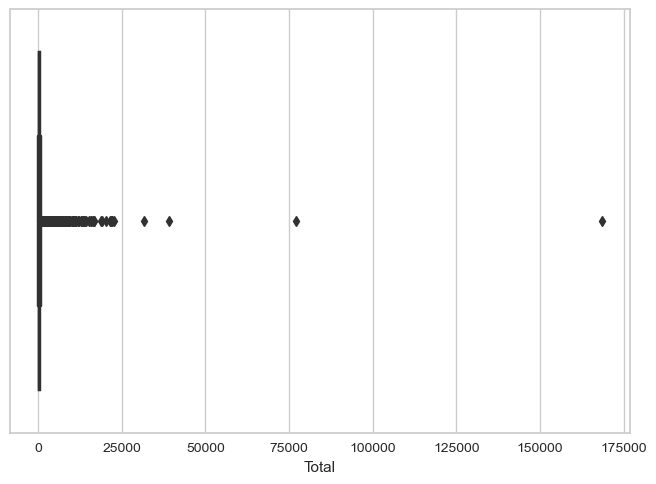

In [135]:
sns.boxplot(df_final["Total"])
plt.show()

In [136]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice_No   18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [137]:
# Checking the date, time

In [138]:
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [139]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [31]:
# Basically we have one year dataset..

In [32]:
# We have to create variable last_bussiness_date i.e latest_date
# we will add one day extra in the max invoice date -- that will be our last business date or latest business date

In [142]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [143]:
# Recency ----> lastest_date - last_transaction date of particular customer
# Frequency  --> Repeatation Customer_ID
# Monetaoy -->  Total w.r.t Customer_ID

In [144]:
RFM_score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "Invoice_No":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [145]:
RFM_score.head(10)

CustomerID  InvoiceDate  Invoice_No     Total
0     12346.0          325           1  77183.60
1     12347.0            2           7   4310.00
2     12348.0           75           4   1797.24
3     12349.0           18           1   1757.55
4     12350.0          310           1    334.40
5     12352.0           36           8   2506.04
6     12353.0          204           1     89.00
7     12354.0          232           1   1079.40
8     12355.0          214           1    459.40
9     12356.0           22           3   2811.43

In [36]:
# lets rename the columns as Recency, Frequency and monetary

In [146]:
# Rename the columns
RFM_score.rename(columns={"InvoiceDate":"Recency","Invoice_No":"Frequency","Total":"Monetary"},inplace=True)
RFM_score.head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      310          1    334.40

In [38]:
# We will create a column(R marks---> recency marks) to give the effective marks
# high recency---->low marks  , low recency -----> high marks # using Rank function 

In [147]:
RFM_score["R_Marks"]=RFM_score["Recency"].rank(ascending=False)  
# ascending= false becaause we want high recency --> low marks

In [148]:
RFM_score.head(10)

CustomerID  Recency  Frequency  Monetary  R_Marks
0     12346.0      325          1  77183.60    162.5
1     12347.0        2          7   4310.00   4156.5
2     12348.0       75          4   1797.24   1646.0
3     12349.0       18          1   1757.55   3209.5
4     12350.0      310          1    334.40    227.5
5     12352.0       36          8   2506.04   2502.5
6     12353.0      204          1     89.00    725.5
7     12354.0      232          1   1079.40    602.5
8     12355.0      214          1    459.40    672.5
9     12356.0       22          3   2811.43   3037.5

In [149]:
RFM_score["F_Marks"]=RFM_score["Frequency"].rank(ascending=True)
RFM_score["M_Marks"]=RFM_score["Monetary"].rank(ascending=True)

In [150]:
RFM_score.head(10)

CustomerID  Recency  Frequency  Monetary  R_Marks  F_Marks  M_Marks
0     12346.0      325          1  77183.60    162.5    746.5   4330.0
1     12347.0        2          7   4310.00   4156.5   3709.5   4004.0
2     12348.0       75          4   1797.24   1646.0   3028.0   3334.0
3     12349.0       18          1   1757.55   3209.5    746.5   3306.0
4     12350.0      310          1    334.40    227.5    746.5   1230.0
5     12352.0       36          8   2506.04   2502.5   3828.0   3638.0
6     12353.0      204          1     89.00    725.5    746.5    117.0
7     12354.0      232          1   1079.40    602.5    746.5   2780.0
8     12355.0      214          1    459.40    672.5    746.5   1660.0
9     12356.0       22          3   2811.43   3037.5   2581.5   3739.0

In [45]:
# We want the percentile of the class / column -- this will give the Rank of customer 

In [151]:
RFM_score["R_Rank"]=(RFM_score["R_Marks"]/RFM_score["R_Marks"].max())*100

In [152]:
RFM_score.head()

CustomerID  Recency  Frequency  Monetary  R_Marks  F_Marks  M_Marks  \
0     12346.0      325          1  77183.60    162.5    746.5   4330.0   
1     12347.0        2          7   4310.00   4156.5   3709.5   4004.0   
2     12348.0       75          4   1797.24   1646.0   3028.0   3334.0   
3     12349.0       18          1   1757.55   3209.5    746.5   3306.0   
4     12350.0      310          1    334.40    227.5    746.5   1230.0   

      R_Rank  
0   3.759833  
1  96.170754  
2  38.084220  
3  74.259602  
4   5.263767

In [153]:
RFM_score["F_Rank"]=(RFM_score["F_Marks"]/RFM_score["F_Marks"].max())*100
RFM_score["M_Rank"]=(RFM_score["M_Marks"]/RFM_score["M_Marks"].max())*100

In [154]:
RFM_score.head(10)

CustomerID  Recency  Frequency  Monetary  R_Marks  F_Marks  M_Marks  \
0     12346.0      325          1  77183.60    162.5    746.5   4330.0   
1     12347.0        2          7   4310.00   4156.5   3709.5   4004.0   
2     12348.0       75          4   1797.24   1646.0   3028.0   3334.0   
3     12349.0       18          1   1757.55   3209.5    746.5   3306.0   
4     12350.0      310          1    334.40    227.5    746.5   1230.0   
5     12352.0       36          8   2506.04   2502.5   3828.0   3638.0   
6     12353.0      204          1     89.00    725.5    746.5    117.0   
7     12354.0      232          1   1079.40    602.5    746.5   2780.0   
8     12355.0      214          1    459.40    672.5    746.5   1660.0   
9     12356.0       22          3   2811.43   3037.5   2581.5   3739.0   

      R_Rank     F_Rank     M_Rank  
0   3.759833  17.204425  99.792579  
1  96.170754  85.492049  92.279327  
2  38.084220  69.785665  76.837981  
3  74.259602  17.204425  76.192671  
4   5.263767  17.204425  28.347546  
5  57.901435  88.223093  83.844204  
6  16.786210  17.204425   2.696474  
7  13.940305  17.204425  64.070062  
8  15.559926  17.204425  38.257663  
9  70.279963  59.495275  86.171929

In [50]:
# WE ARE UNDERSTANDING THE GENERIC CONCEPT - WHICH CAN BE APPLY ON FIFFERENT INDUSTRIES.

In [155]:
RFM=RFM_score.copy()

In [156]:
RFM["RFM_final"]=0.20*RFM["R_Rank"]+0.30*RFM["F_Rank"]+0.50*RFM["M_Rank"]

In [157]:
RFM.head()

CustomerID  Recency  Frequency  Monetary  R_Marks  F_Marks  M_Marks  \
0     12346.0      325          1  77183.60    162.5    746.5   4330.0   
1     12347.0        2          7   4310.00   4156.5   3709.5   4004.0   
2     12348.0       75          4   1797.24   1646.0   3028.0   3334.0   
3     12349.0       18          1   1757.55   3209.5    746.5   3306.0   
4     12350.0      310          1    334.40    227.5    746.5   1230.0   

      R_Rank     F_Rank     M_Rank  RFM_final  
0   3.759833  17.204425  99.792579  55.809584  
1  96.170754  85.492049  92.279327  91.021429  
2  38.084220  69.785665  76.837981  66.971534  
3  74.259602  17.204425  76.192671  58.109583  
4   5.263767  17.204425  28.347546  20.387854

In [159]:
RFM=RFM.round(2)
RFM.head(5)

CustomerID  Recency  Frequency  Monetary  R_Marks  F_Marks  M_Marks  \
0     12346.0      325          1  77183.60    162.5    746.5   4330.0   
1     12347.0        2          7   4310.00   4156.5   3709.5   4004.0   
2     12348.0       75          4   1797.24   1646.0   3028.0   3334.0   
3     12349.0       18          1   1757.55   3209.5    746.5   3306.0   
4     12350.0      310          1    334.40    227.5    746.5   1230.0   

   R_Rank  F_Rank  M_Rank  RFM_final  
0    3.76   17.20   99.79      55.81  
1   96.17   85.49   92.28      91.02  
2   38.08   69.79   76.84      66.97  
3   74.26   17.20   76.19      58.11  
4    5.26   17.20   28.35      20.39

## Top 10 Customer with Highest RFM Value

In [160]:
RFM.sort_values("RFM_final",ascending=False).head(10)

CustomerID  Recency  Frequency   Monetary  R_Marks  F_Marks  M_Marks  \
4202     18102.0        0         60  259657.30   4322.0   4329.0   4338.0   
2177     15311.0        0         91   60767.90   4322.0   4334.0   4326.0   
326      12748.0        0        211   33719.73   4322.0   4339.0   4312.0   
1690     14646.0        1         74  280206.02   4253.0   4332.0   4339.0   
1880     14911.0        1        202  143825.06   4253.0   4338.0   4335.0   
3684     17389.0        0         34   31833.68   4322.0   4307.0   4309.0   
4011     17841.0        1        124   40991.57   4253.0   4337.0   4317.0   
4094     17949.0        1         45   58510.48   4253.0   4319.0   4324.0   
1059     13777.0        0         33   25977.16   4322.0   4304.5   4302.0   
1070     13798.0        1         57   37153.85   4253.0   4328.0   4315.0   

      R_Rank  F_Rank  M_Rank  RFM_final  
4202   100.0   99.77   99.98      99.92  
2177   100.0   99.88   99.70      99.82  
326    100.0  100.00   99.38      99.69  
1690    98.4   99.84  100.00      99.63  
1880    98.4   99.98   99.91      99.63  
3684   100.0   99.26   99.31      99.43  
4011    98.4   99.95   99.49      99.41  
4094    98.4   99.54   99.65      99.37  
1059   100.0   99.20   99.15      99.34  
1070    98.4   99.75   99.45      99.33

## Clustering Of Customers -- On the basis of RFM_final Score

In [161]:
quant=RFM["RFM_final"].quantile(q=[0.25,0.50,0.75])

In [162]:
quant

0.25    27.725
0.50    48.780
0.75    71.490
Name: RFM_final, dtype: float64

In [59]:
# we can create 5 groups also
quant10=RFM["RFM_final"].quantile(q=[0.10,0.30,0.45,0.70])
quant10

0.10    16.454
0.30    31.732
0.45    44.612
0.70    66.680
Name: RFM_final, dtype: float64

### Visualization Approach 

In [165]:
import plotly.express as px
fig=px.ecdf(RFM,x=RFM["RFM_final"])
fig.update_xaxes(title_text="RFM_Proportion")
fig.update_yaxes(title_text="Quantile")
fig.update_layout(title="Measuring the Quantile of the RFM_Final")
fig.show()

<AxesSubplot:xlabel='RFM_final', ylabel='Proportion'>

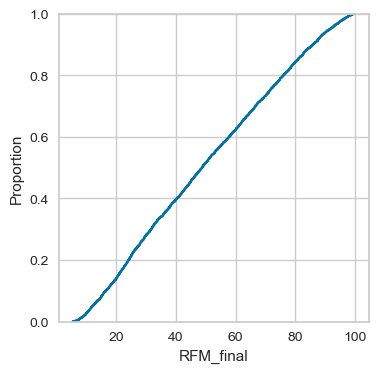

In [166]:
plt.figure(figsize=(4,4))
sns.ecdfplot(data=RFM["RFM_final"])

### Grouping in four different Category:- Silver, Gold , Diamond, Platinum

In [171]:
def cust_category(x):
    if x<=27.72:
        return "Silver"
    if x<=48.78:
        return "Gold"
    if x<=71.49:
        return "Diamond"
    else:
        return "Platinum"

In [172]:
RFM["Group"]=RFM["RFM_final"].apply(cust_category)
RFM.head(10)

CustomerID  Recency  Frequency  Monetary  R_Marks  F_Marks  M_Marks  \
0     12346.0      325          1  77183.60    162.5    746.5   4330.0   
1     12347.0        2          7   4310.00   4156.5   3709.5   4004.0   
2     12348.0       75          4   1797.24   1646.0   3028.0   3334.0   
3     12349.0       18          1   1757.55   3209.5    746.5   3306.0   
4     12350.0      310          1    334.40    227.5    746.5   1230.0   
5     12352.0       36          8   2506.04   2502.5   3828.0   3638.0   
6     12353.0      204          1     89.00    725.5    746.5    117.0   
7     12354.0      232          1   1079.40    602.5    746.5   2780.0   
8     12355.0      214          1    459.40    672.5    746.5   1660.0   
9     12356.0       22          3   2811.43   3037.5   2581.5   3739.0   

   R_Rank  F_Rank  M_Rank  RFM_final     Group  
0    3.76   17.20   99.79      55.81   Diamond  
1   96.17   85.49   92.28      91.02  Platinum  
2   38.08   69.79   76.84      66.97   Diamond  
3   74.26   17.20   76.19      58.11   Diamond  
4    5.26   17.20   28.35      20.39    Silver  
5   57.90   88.22   83.84      79.97  Platinum  
6   16.79   17.20    2.70       9.87    Silver  
7   13.94   17.20   64.07      39.98      Gold  
8   15.56   17.20   38.26      27.40    Silver  
9   70.28   59.50   86.17      74.99  Platinum

In [173]:
RFM["Group"].value_counts()

Platinum    1085
Silver      1085
Gold        1085
Diamond     1084
Name: Group, dtype: int64

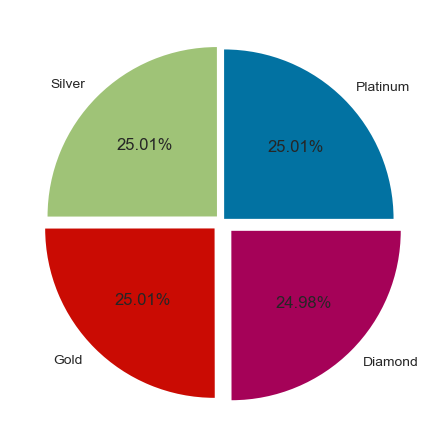

In [184]:
plt.pie(RFM["Group"].value_counts(),labels=RFM["Group"].value_counts().index,autopct="%2.2f%%",explode=[0.02,0.04,0.06,0.08])
plt.show()
#fig=px.pie(RFM,values=RFM["Group"].value_counts(),names=RFM["Group"].value_counts().index,hole=0.3)
#fig.show()

## Kmeans Clustering 

In [185]:
final_data=pd.DataFrame(RFM["RFM_final"])
final_data.head(10)

RFM_final
0      55.81
1      91.02
2      66.97
3      58.11
4      20.39
5      79.97
6       9.87
7      39.98
8      27.40
9      74.99

In [186]:
# lets scale the values
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [188]:
scale=MinMaxScaler()
final_data_scaled=scale.fit_transform(final_data)
final_data_scaled
final_data_scaled=pd.DataFrame(final_data_scaled,columns=final_data.columns)
final_data_scaled.head()

RFM_final
0   0.533425
1   0.905860
2   0.651470
3   0.557753
4   0.158769

In [189]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Sum of square error')

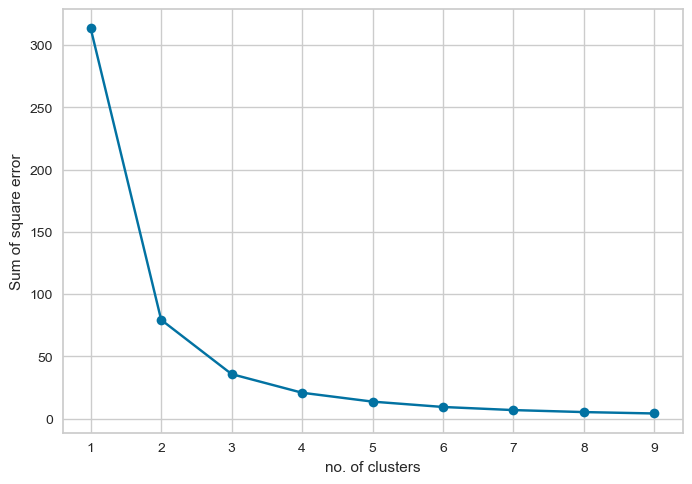

In [190]:
SSE=[]
for i in range(1,10):
    kmeans1=KMeans(max_iter=100,random_state=100,n_clusters=i)
    kmeans1.fit_predict(final_data_scaled)
    SSE.append(kmeans1.inertia_)
    
plt.plot(range(1,10),SSE,marker="o")
plt.xlabel("no. of clusters")
plt.ylabel("Sum of square error")


In [193]:
for i in range(2,9):
    kmeans2=KMeans(max_iter=100,random_state=100,n_clusters=i)
    kmeans2.fit(final_data_scaled)
    silhoutte=silhouette_score(final_data_scaled,kmeans2.labels_)
    print("for {} score {}".format(i,silhoutte))
    

for 2 score 0.6256262261585409
for 3 score 0.5884544423323724
for 4 score 0.5633324533135928
for 5 score 0.5452239191592716
for 6 score 0.5450751496194505
for 7 score 0.5428077260671375
for 8 score 0.5393158399413998


In [80]:
#!pip install yellowbrick

In [194]:
from yellowbrick.cluster import KElbowVisualizer

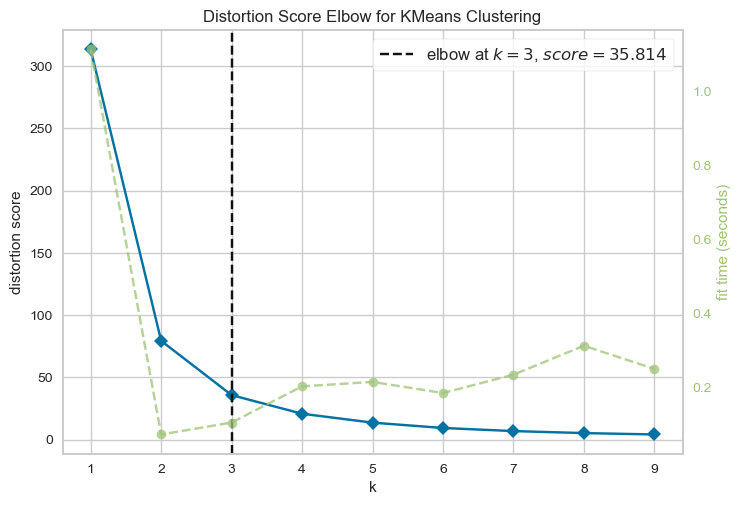

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [195]:
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,10)).fit(final_data_scaled)
visualizer.show()

In [196]:
kmeans=KMeans(n_clusters=4,random_state=101)
y_kmeans=kmeans.fit_predict(final_data_scaled)
y_kmeans

array([3, 1, 3, ..., 0, 1, 3])

In [197]:
RFM["Cluster"]=y_kmeans

In [198]:
RFM.head(20)

CustomerID  Recency  Frequency  Monetary  R_Marks  F_Marks  M_Marks  \
0      12346.0      325          1  77183.60    162.5    746.5   4330.0   
1      12347.0        2          7   4310.00   4156.5   3709.5   4004.0   
2      12348.0       75          4   1797.24   1646.0   3028.0   3334.0   
3      12349.0       18          1   1757.55   3209.5    746.5   3306.0   
4      12350.0      310          1    334.40    227.5    746.5   1230.0   
5      12352.0       36          8   2506.04   2502.5   3828.0   3638.0   
6      12353.0      204          1     89.00    725.5    746.5    117.0   
7      12354.0      232          1   1079.40    602.5    746.5   2780.0   
8      12355.0      214          1    459.40    672.5    746.5   1660.0   
9      12356.0       22          3   2811.43   3037.5   2581.5   3739.0   
10     12357.0       33          1   6207.67   2571.0    746.5   4138.0   
11     12358.0        1          2   1168.06   4253.0   1910.5   2872.0   
12     12359.0       57          4   6372.58   2027.0   3028.0   4145.0   
13     12360.0       52          3   2662.06   2121.0   2581.5   3696.0   
14     12361.0      287          1    189.90    313.5    746.5    600.0   
15     12362.0        3         10   5226.23   4064.5   3974.5   4085.0   
16     12363.0      109          2    552.00   1294.0   1910.5   1882.0   
17     12364.0        7          4   1313.10   3839.5   3028.0   2997.0   
18     12365.0      291          2    641.38    292.0   1910.5   2096.0   
19     12367.0        4          1    168.90   3970.5    746.5    505.0   

    R_Rank  F_Rank  M_Rank  RFM_final     Group  Cluster  
0     3.76   17.20   99.79      55.81   Diamond        3  
1    96.17   85.49   92.28      91.02  Platinum        1  
2    38.08   69.79   76.84      66.97   Diamond        3  
3    74.26   17.20   76.19      58.11   Diamond        3  
4     5.26   17.20   28.35      20.39    Silver        2  
5    57.90   88.22   83.84      79.97  Platinum        1  
6    16.79   17.20    2.70       9.87    Silver        2  
7    13.94   17.20   64.07      39.98      Gold        0  
8    15.56   17.20   38.26      27.40    Silver        2  
9    70.28   59.50   86.17      74.99  Platinum        1  
10   59.49   17.20   95.37      64.74   Diamond        3  
11   98.40   44.03   66.19      65.99   Diamond        3  
12   46.90   69.79   95.53      78.08  Platinum        1  
13   49.07   59.50   85.18      70.25   Diamond        3  
14    7.25   17.20   13.83      13.53    Silver        2  
15   94.04   91.60   94.15      93.36  Platinum        1  
16   29.94   44.03   43.37      40.88      Gold        0  
17   88.84   69.79   69.07      73.24  Platinum        3  
18    6.76   44.03   48.31      38.71      Gold        0  
19   91.87   17.20   11.64      29.35      Gold        2

In [199]:
RFM["Cluster"].value_counts()

2    1235
0    1119
3    1030
1     955
Name: Cluster, dtype: int64

In [200]:
RFM["Group"].value_counts()

Platinum    1085
Silver      1085
Gold        1085
Diamond     1084
Name: Group, dtype: int64

<AxesSubplot:xlabel='RFM_final', ylabel='Cluster'>

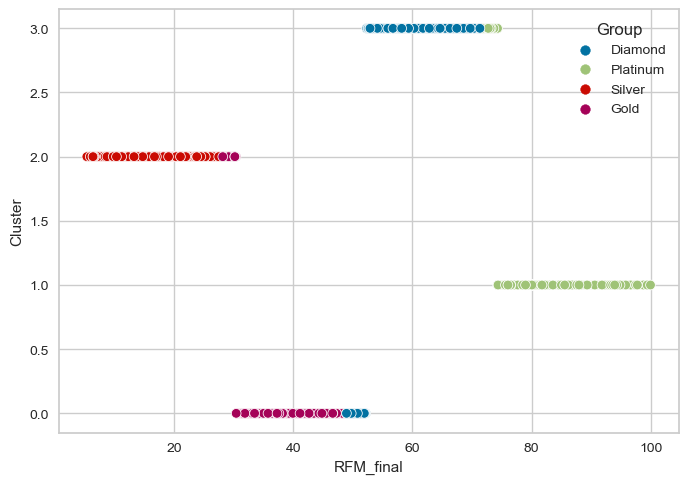

In [201]:
sns.scatterplot(x=RFM["RFM_final"],y=RFM["Cluster"],hue="Group",data=RFM)

# Second Problem Statement :- Analysing the Business Sales Trend-
    (1)When do the highest sales occur ? (Month/season/day/timing )
    (2)when does highest sales happen ? - month /season day/ morning                afternoon/evening /weekdays/weekends

In [202]:
df_final.head()

Invoice_No         InvoiceDate  CustomerID   Total
0      536365 2010-12-01 08:26:00     17850.0  139.12
1      536366 2010-12-01 08:28:00     17850.0   22.20
2      536367 2010-12-01 08:34:00     13047.0  278.73
3      536368 2010-12-01 08:34:00     13047.0   70.05
4      536369 2010-12-01 08:35:00     13047.0   17.85

In [203]:
import datetime as dt

In [204]:
# extraction of Day from invoicedate
df_final["Day"]=df_final["InvoiceDate"].dt.day_name()
df_final.head()

Invoice_No         InvoiceDate  CustomerID   Total        Day
0      536365 2010-12-01 08:26:00     17850.0  139.12  Wednesday
1      536366 2010-12-01 08:28:00     17850.0   22.20  Wednesday
2      536367 2010-12-01 08:34:00     13047.0  278.73  Wednesday
3      536368 2010-12-01 08:34:00     13047.0   70.05  Wednesday
4      536369 2010-12-01 08:35:00     13047.0   17.85  Wednesday

In [205]:
df_final["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [206]:
# extraction of Month,Hour from datetime (invoicedate)
df_final["Month"]=df_final["InvoiceDate"].dt.month
df_final["Hour"]=df_final["InvoiceDate"].dt.hour
df_final.head()

Invoice_No         InvoiceDate  CustomerID   Total        Day  Month  Hour
0      536365 2010-12-01 08:26:00     17850.0  139.12  Wednesday     12     8
1      536366 2010-12-01 08:28:00     17850.0   22.20  Wednesday     12     8
2      536367 2010-12-01 08:34:00     13047.0  278.73  Wednesday     12     8
3      536368 2010-12-01 08:34:00     13047.0   70.05  Wednesday     12     8
4      536369 2010-12-01 08:35:00     13047.0   17.85  Wednesday     12     8

In [89]:
# create a weekday/weekend column

In [90]:
#df_final["Weekday"]=df_final["InvoiceDate"].dt.weekday

In [207]:
#df_final.head()

In [211]:
df_final["Weekend"]=np.where((df_final["Day"]=="Saturday")|(df_final["Day"]=="Sunday"),"Yes","No")

In [212]:
df_final.head()

Invoice_No         InvoiceDate  CustomerID   Total        Day  Month  Hour  \
0      536365 2010-12-01 08:26:00     17850.0  139.12  Wednesday     12     8   
1      536366 2010-12-01 08:28:00     17850.0   22.20  Wednesday     12     8   
2      536367 2010-12-01 08:34:00     13047.0  278.73  Wednesday     12     8   
3      536368 2010-12-01 08:34:00     13047.0   70.05  Wednesday     12     8   
4      536369 2010-12-01 08:35:00     13047.0   17.85  Wednesday     12     8   

  Weekend  
0      No  
1      No  
2      No  
3      No  
4      No

In [214]:
df_final["Weekend"].value_counts()

No     16389
Yes     2177
Name: Weekend, dtype: int64

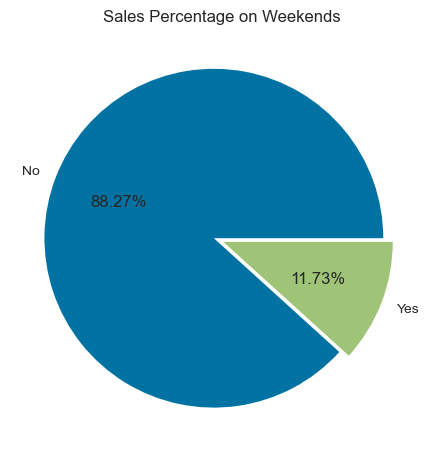

In [218]:
plt.pie(df_final["Weekend"].value_counts(),labels=df_final["Weekend"].value_counts().index,autopct="%2.2f%%",explode=[0.05,0.01])
plt.title("Sales Percentage on Weekends")
plt.show()


#### Creation of Seasons , Timing 

In [225]:
# season - we will use the month information
def cal_season(x):
    if x in [11,12,1,2]:
        return "Winter"
    elif x in [3,4]:
        return "Spring"
    elif x in [5,6]:
        return "Summer"
    else:
        return "Monsoon"
        

In [226]:
# timing - we will use the hour information
def cal_timing(x):
    if x in range(22,4):
        return " night"
    elif x in range(4,11):
        return "Morning"
    elif x in range(11,16):
        return "Afternoon"
    else:
        return "Evening"

In [227]:
df_final["Season"]=df_final["Month"].apply(cal_season)

In [228]:
df_final["Timing"]=df_final["Hour"].apply(cal_timing)

In [229]:
df_final.head(10)

Invoice_No         InvoiceDate  CustomerID   Total        Day  Month  Hour  \
0      536365 2010-12-01 08:26:00     17850.0  139.12  Wednesday     12     8   
1      536366 2010-12-01 08:28:00     17850.0   22.20  Wednesday     12     8   
2      536367 2010-12-01 08:34:00     13047.0  278.73  Wednesday     12     8   
3      536368 2010-12-01 08:34:00     13047.0   70.05  Wednesday     12     8   
4      536369 2010-12-01 08:35:00     13047.0   17.85  Wednesday     12     8   
5      536370 2010-12-01 08:45:00     12583.0  855.86  Wednesday     12     8   
6      536371 2010-12-01 09:00:00     13748.0  204.00  Wednesday     12     9   
7      536372 2010-12-01 09:01:00     17850.0   22.20  Wednesday     12     9   
8      536373 2010-12-01 09:02:00     17850.0  259.86  Wednesday     12     9   
9      536374 2010-12-01 09:09:00     15100.0  350.40  Wednesday     12     9   

  Weekend  Season   Timing  
0      No  Winter  Morning  
1      No  Winter  Morning  
2      No  Winter  Morning  
3      No  Winter  Morning  
4      No  Winter  Morning  
5      No  Winter  Morning  
6      No  Winter  Morning  
7      No  Winter  Morning  
8      No  Winter  Morning  
9      No  Winter  Morning

In [230]:
df_final["Season"].value_counts()

Winter     6835
Monsoon    6301
Summer     2953
Spring     2477
Name: Season, dtype: int64

In [231]:
df_final["Timing"].value_counts()

Afternoon    12374
Morning       4210
Evening       1982
Name: Timing, dtype: int64

In [232]:
# plotting the pie chart for day wise business activity

In [234]:
day_count=df_final.groupby("Day")["Invoice_No"].count().to_frame("count no. of invoice").reset_index()
day_count

Day  count no. of invoice
0     Friday                  2835
1     Monday                  2865
2     Sunday                  2177
3   Thursday                  4038
4    Tuesday                  3189
5  Wednesday                  3462

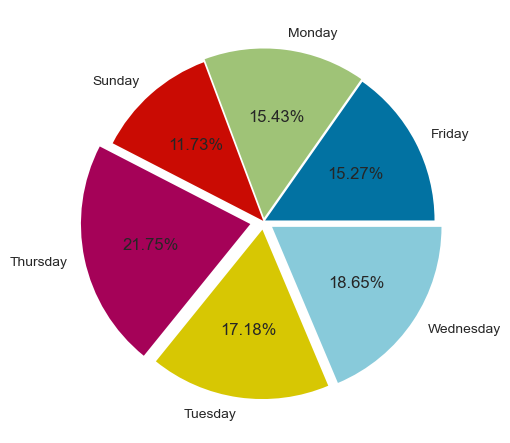

In [245]:
plt.pie(day_count["count no. of invoice"],labels=day_count["Day"],autopct="%.2f%%",explode=[0.01,0.02,0.003,0.08,0.05,0.06])
plt.show()

In [246]:
# bar plot
day=df_final["Day"].value_counts()
day

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [247]:
day.index

Index(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday', 'Sunday'], dtype='object')

In [248]:
day.values

array([4038, 3462, 3189, 2865, 2835, 2177], dtype=int64)

Text(0, 0.5, 'No. of invoice')

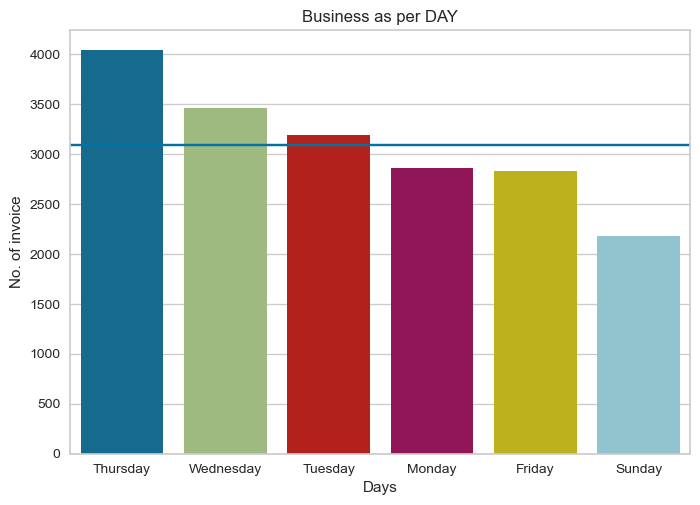

In [249]:
sns.barplot(x=day.index,y=day.values)
plt.axhline(y=day.mean())
plt.title("Business as per DAY")
plt.xlabel("Days")
plt.ylabel("No. of invoice")

In [251]:
season=df_final["Season"].value_counts()
season

Winter     6835
Monsoon    6301
Summer     2953
Spring     2477
Name: Season, dtype: int64

<AxesSubplot:>

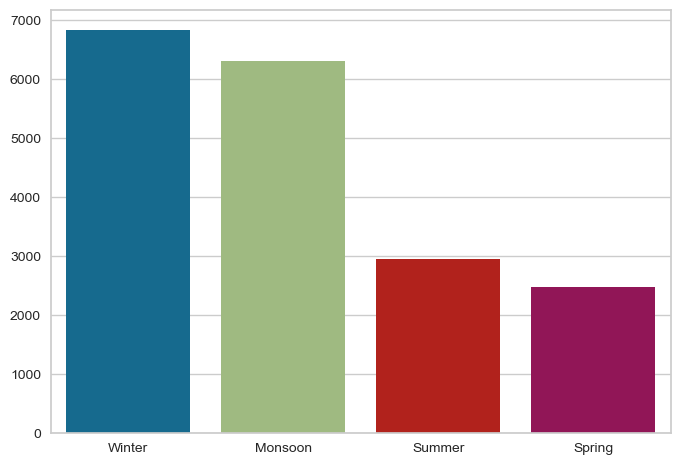

In [262]:
sns.barplot(x=season.index,y=season.values)

In [263]:
season_count=df_final.groupby("Season")["Invoice_No"].count().to_frame("Count no. of invoice").reset_index()
season_count

Season  Count no. of invoice
0  Monsoon                  6301
1   Spring                  2477
2   Summer                  2953
3   Winter                  6835

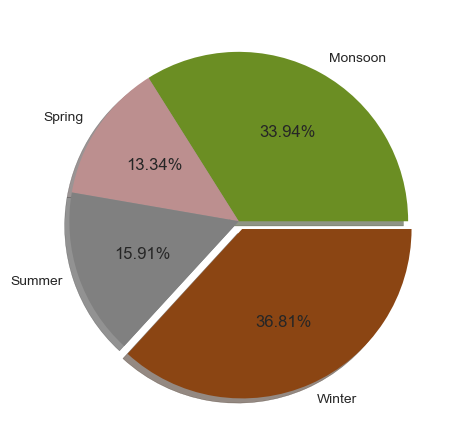

In [281]:

plt.pie(season_count["Count no. of invoice"],labels=season_count["Season"],autopct="%2.2f%%",explode=[0,0,0,0.05],colors=["olivedrab","rosybrown","gray","saddlebrown"],shadow=True)
plt.show()

In [282]:
timing_count=df_final.groupby("Timing")["Invoice_No"].count().to_frame("Count no. of invoice").reset_index()
timing_count

Timing  Count no. of invoice
0  Afternoon                 12374
1    Evening                  1982
2    Morning                  4210

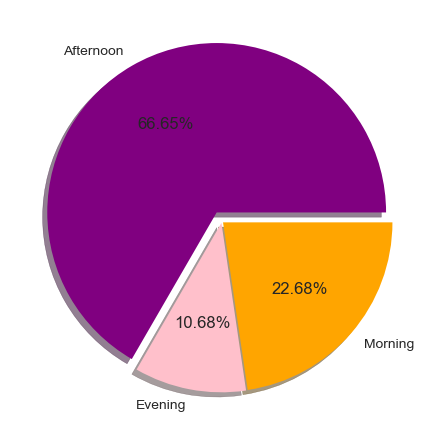

In [290]:
plt.pie(timing_count["Count no. of invoice"],labels=timing_count["Timing"],autopct="%2.2f%%",explode=[0.06,0.01,0.01],shadow=True,colors=["purple","pink","orange"])
plt.show()

In [292]:
timing_count.mean()

Count no. of invoice    6188.666667
dtype: float64

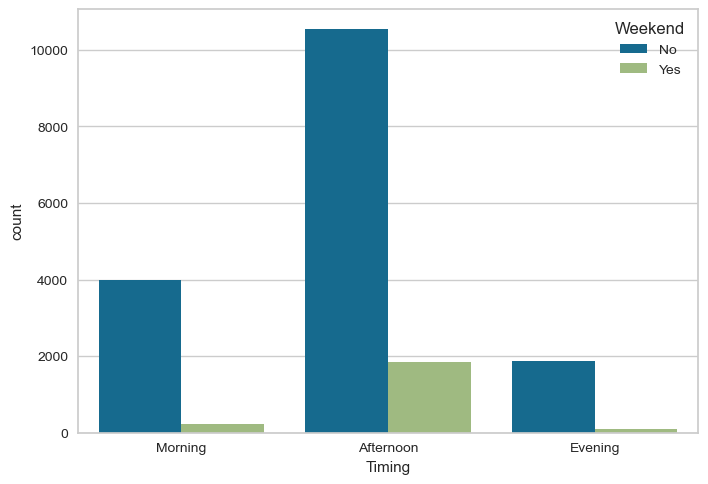

In [303]:
sns.countplot(x=df_final["Timing"],hue=df_final["Weekend"])
plt.show()

In [118]:
# lets plot a graph  weekend with timing 

In [304]:
timing=df_final["Timing"].value_counts()
timing

Afternoon    12374
Morning       4210
Evening       1982
Name: Timing, dtype: int64

In [305]:
timing.mean()

6188.666666666667

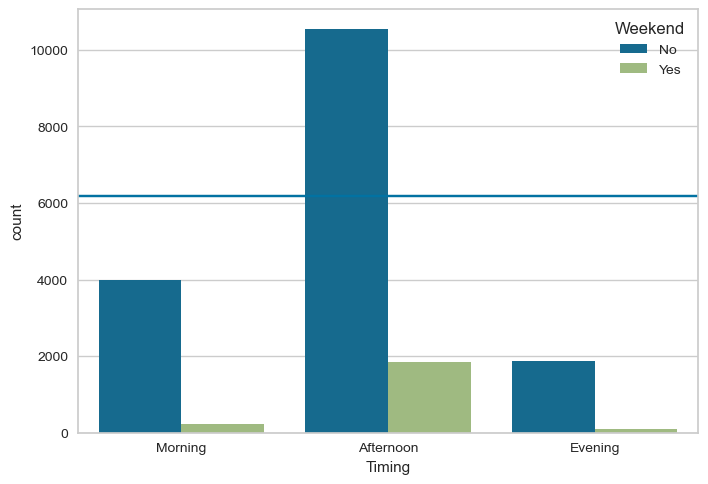

In [306]:
sns.countplot(x=df_final["Timing"],hue=df_final["Weekend"])
plt.axhline(y=timing.mean())

### Find the Best Selling Product

In [307]:
df.head()

Invoice_No Item_Code                          lower_floor  \
0     536365    85123A   white hanging heart t-light holder   
1     536365     71053                  white metal lantern   
2     536365    84406B       cream cupid hearts coat hanger   
3     536365    84029G  knitted union flag hot water bottle   
4     536365    84029E       red woolly hottie white heart.   

                      Item_Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  
0       2.55     17850.0  United Kingdom  
1       3.39     17850.0  United Kingdom  
2       2.75     17850.0  United Kingdom  
3       3.39     17850.0  United Kingdom  
4       3.39     17850.0  United Kingdom

In [308]:
df_top=df.drop(["lower_floor","CustomerID"],axis=1)
df_top.head(2)

Invoice_No Item_Code                    Item_Description  Quantity  \
0     536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice         Country  
0 2010-12-01 08:26:00       2.55  United Kingdom  
1 2010-12-01 08:26:00       3.39  United Kingdom

In [125]:
#df_top["Total"]=df_top["Quantity"]*df_top["UnitPrice"]

In [126]:
#df_top.drop(["Quantity","UnitPrice"],axis=1,inplace=True)

In [137]:
df_top.head(2)

Invoice_No Item_Code                    Item_Description  Quantity  \
0     536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice         Country  
0 2010-12-01 08:26:00       2.55  United Kingdom  
1 2010-12-01 08:26:00       3.39  United Kingdom

In [309]:
# create a pivot table
df_top_pivot=df_top.pivot_table(values="Quantity",index=["Item_Description"],aggfunc="sum",sort=True).reset_index()

In [310]:
df_top_pivot.head()

Item_Description  Quantity
0                           20713      -400
1   4 PURPLE FLOCK DINNER CANDLES       144
2   50'S CHRISTMAS GIFT BAG LARGE      1913
3               DOLLY GIRL BEAKER      2448
4     I LOVE LONDON MINI BACKPACK       389

### Best Top 20 Selling Product

In [311]:
df_top_pivot.sort_values(by="Quantity",ascending=False).head(20)

Item_Description  Quantity
4009   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1866             JUMBO BAG RED RETROSPOT     47363
244        ASSORTED COLOUR BIRD ORNAMENT     36381
2740                      POPCORN HOLDER     36334
2395     PACK OF 72 RETROSPOT CAKE CASES     36039
3918  WHITE HANGING HEART T-LIGHT HOLDER     35317
2803                  RABBIT NIGHT LIGHT     30680
2161             MINI PAINT SET VINTAGE      26437
2361          PACK OF 12 LONDON TISSUES      26315
2393  PACK OF 60 PINK PAISLEY CAKE CASES     24753
3747     VICTORIAN GLASS HANGING T-LIGHT     23854
252            ASSORTED COLOURS SILK FAN     23082
587                  BROCADE RING PURSE      23053
2827              RED  HARMONICA IN BOX      21866
1864             JUMBO BAG PINK POLKADOT     21009
3469                SMALL POPCORN HOLDER     20116
2439     PAPER CHAIN KIT 50'S CHRISTMAS      18902
2054             LUNCH BAG RED RETROSPOT     18779
114          60 TEATIME FAIRY CAKE CASES     18040
2471                       PARTY BUNTING     18022

In [312]:
# we can do the same by using groupby function
df_top.head()

Invoice_No Item_Code                     Item_Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice         Country  
0 2010-12-01 08:26:00       2.55  United Kingdom  
1 2010-12-01 08:26:00       3.39  United Kingdom  
2 2010-12-01 08:26:00       2.75  United Kingdom  
3 2010-12-01 08:26:00       3.39  United Kingdom  
4 2010-12-01 08:26:00       3.39  United Kingdom

In [314]:
df_top.groupby("Item_Description").sum().reset_index().sort_values(by="Quantity",ascending=False).head(20)

Item_Description  Quantity  UnitPrice
4009   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847     173.39
1866             JUMBO BAG RED RETROSPOT     47363    5333.30
244        ASSORTED COLOUR BIRD ORNAMENT     36381    2584.77
2740                      POPCORN HOLDER     36334     874.50
2395     PACK OF 72 RETROSPOT CAKE CASES     36039    1047.04
3918  WHITE HANGING HEART T-LIGHT HOLDER     35317    7590.87
2803                  RABBIT NIGHT LIGHT     30680    2496.53
2161             MINI PAINT SET VINTAGE      26437     304.81
2361          PACK OF 12 LONDON TISSUES      26315     236.87
2393  PACK OF 60 PINK PAISLEY CAKE CASES     24753     664.13
3747     VICTORIAN GLASS HANGING T-LIGHT     23854    1770.21
252            ASSORTED COLOURS SILK FAN     23082     557.23
587                  BROCADE RING PURSE      23053     260.67
2827              RED  HARMONICA IN BOX      21866     961.58
1864             JUMBO BAG PINK POLKADOT     21009    3238.56
3469                SMALL POPCORN HOLDER     20116     652.61
2439     PAPER CHAIN KIT 50'S CHRISTMAS      18902    4054.90
2054             LUNCH BAG RED RETROSPOT     18779    3461.91
114          60 TEATIME FAIRY CAKE CASES     18040     596.86
2471                       PARTY BUNTING     18022    9979.62

## Top Selling Product Country Wise

In [315]:
df_top["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [317]:
df_country=df_top.pivot_table(values="Quantity",index=["Country","Item_Description"],aggfunc="sum",sort=True).reset_index()
df_country

Country               Item_Description  Quantity
0        Australia              DOLLY GIRL BEAKER       200
1        Australia    I LOVE LONDON MINI BACKPACK         4
2        Australia         10 COLOUR SPACEBOY PEN        48
3        Australia  12 PENCIL SMALL TUBE WOODLAND       384
4        Australia      12 PENCILS TALL TUBE POSY       252
...            ...                            ...       ...
20171  Unspecified           WRAP POPPIES  DESIGN        25
20172  Unspecified          WRAP SUKI AND FRIENDS        25
20173  Unspecified    WRAP VINTAGE PETALS  DESIGN        25
20174  Unspecified               WRAP WEDDING DAY        25
20175  Unspecified    ZINC METAL HEART DECORATION         2

[20176 rows x 3 columns]

### Top 10 Selling Product in Australia

In [324]:
australia=df_country[df_country["Country"]=="Australia"]
australia.sort_values(by="Quantity",ascending=False).head(10)

Country               Item_Description  Quantity
287  Australia        MINI PAINT SET VINTAGE       2916
377  Australia             RABBIT NIGHT LIGHT      1884
386  Australia         RED  HARMONICA IN BOX       1704
410  Australia  RED TOADSTOOL LED NIGHT LIGHT      1344
124  Australia           DOLLY GIRL LUNCH BOX      1024
210  Australia   HOMEMADE JAM SCENTED CANDLES       994
533  Australia            SPACEBOY LUNCH BOX        960
285  Australia           MINI JIGSAW SPACEBOY       720
57   Australia         BLUE HARMONICA IN BOX        720
15   Australia    4 TRADITIONAL SPINNING TOPS       700

### Top 10 Selling Product in United Kingdom

In [327]:
uk=df_country[df_country["Country"]=="United Kingdom"]
uk.sort_values(by="Quantity",ascending=False).head(10)

Country                    Item_Description  Quantity
19618  United Kingdom   WORLD WAR 2 GLIDERS ASSTD DESIGNS     48326
17488  United Kingdom             JUMBO BAG RED RETROSPOT     43167
18355  United Kingdom                      POPCORN HOLDER     34365
15872  United Kingdom       ASSORTED COLOUR BIRD ORNAMENT     33679
19528  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER     33193
17980  United Kingdom          PACK OF 12 LONDON TISSUES      25307
18014  United Kingdom     PACK OF 72 RETROSPOT CAKE CASES     24702
19358  United Kingdom     VICTORIAN GLASS HANGING T-LIGHT     23242
16214  United Kingdom                 BROCADE RING PURSE      22801
15880  United Kingdom           ASSORTED COLOURS SILK FAN     20322

### Top 10 Selling Product in United State America

In [328]:
usa=df_country[df_country["Country"]=="USA"]
usa.sort_values(by="Quantity",ascending=False).head(10)

Country                     Item_Description  Quantity
15509     USA       SET 12 COLOURING PENCILS DOILY        88
15400     USA  12 PENCILS SMALL TUBE RED RETROSPOT        72
15537     USA    SET/10 RED POLKADOT PARTY CANDLES        48
15536     USA   SET/10 PINK POLKADOT PARTY CANDLES        48
15515     USA   SET 6 SCHOOL MILK BOTTLES IN CRATE        48
15535     USA  SET/10 IVORY POLKADOT PARTY CANDLES        48
15534     USA   SET/10 BLUE POLKADOT PARTY CANDLES        48
15476     USA    PARTY CONES CANDY TREE DECORATION        36
15467     USA     PACK OF 20 NAPKINS PANTRY DESIGN        36
15531     USA       SET OF 6 TEA TIME BAKING CASES        32

# Third Problem Statement : Building a Recommendation Engine

# Recommendation Engine

<img src="collaborative.jpg">

In [ ]:
There are different types of recommendation engines, such as 
1) Content-based filtering
2) Collaborative filtering
3) Hybrid filtering

### Collaborative filtering :-

In [336]:
df100=original_data.copy()
df100.head()

Invoice_No Item_Code                          lower_floor  \
0     536365    85123A   white hanging heart t-light holder   
1     536365     71053                  white metal lantern   
2     536365    84406B       cream cupid hearts coat hanger   
3     536365    84029G  knitted union flag hot water bottle   
4     536365    84029E       red woolly hottie white heart.   

                      Item_Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  
0       2.55     17850.0  United Kingdom  
1       3.39     17850.0  United Kingdom  
2       2.75     17850.0  United Kingdom  
3       3.39     17850.0  United Kingdom  
4       3.39     17850.0  United Kingdom

In [337]:
df100.drop(["lower_floor"],axis=1,inplace=True)

In [338]:
df100.dropna(axis=0,inplace=True)

In [339]:
df100.isnull().sum()

Invoice_No          0
Item_Code           0
Item_Description    0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
dtype: int64

In [340]:
# create a pivot table

In [341]:
custID_matrix=df100.pivot_table(index="CustomerID",columns="Item_Code",values="Quantity",aggfunc="sum")

In [342]:
custID_matrix.head(10)

Item_Code   10002  10080  10120  10125  10133  10135  11001  15030  15034  \
CustomerID                                                                  
12346.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12347.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12348.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12349.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12350.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12352.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12353.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12354.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12355.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12356.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Item_Code   15036  ...  90214Y  90214Z  BANK CHARGES  C2  CRUK   D  DOT    M  \
CustomerID         ...                                                         
12346.0       NaN  ...     NaN     NaN           NaN NaN   NaN NaN  NaN  NaN   
12347.0       NaN  ...     NaN     NaN           NaN NaN   NaN NaN  NaN  NaN   
12348.0       NaN  ...     NaN     NaN           NaN NaN   NaN NaN  NaN  NaN   
12349.0       NaN  ...     NaN     NaN           NaN NaN   NaN NaN  NaN  NaN   
12350.0       NaN  ...     NaN     NaN           NaN NaN   NaN NaN  NaN  NaN   
12352.0       NaN  ...     NaN     NaN           NaN NaN   NaN NaN  NaN  0.0   
12353.0       NaN  ...     NaN     NaN           NaN NaN   NaN NaN  NaN  NaN   
12354.0       NaN  ...     NaN     NaN           NaN NaN   NaN NaN  NaN  NaN   
12355.0       NaN  ...     NaN     NaN           NaN NaN   NaN NaN  NaN  NaN   
12356.0       NaN  ...     NaN     NaN           NaN NaN   NaN NaN  NaN  NaN   

Item_Code   PADS  POST  
CustomerID              
12346.0      NaN   NaN  
12347.0      NaN   NaN  
12348.0      NaN   9.0  
12349.0      NaN   1.0  
12350.0      NaN   1.0  
12352.0      NaN   7.0  
12353.0      NaN   NaN  
12354.0      NaN   NaN  
12355.0      NaN   NaN  
12356.0      NaN  18.0  

[10 rows x 3684 columns]

In [346]:
# apply the map approach to chnage Nan as 0 

In [347]:
custID_matrix=custID_matrix.applymap(lambda x:1 if x>0 else 0)

In [348]:
custID_matrix.head(10)

Item_Code   10002  10080  10120  10125  10133  10135  11001  15030  15034  \
CustomerID                                                                  
12346.0         0      0      0      0      0      0      0      0      0   
12347.0         0      0      0      0      0      0      0      0      0   
12348.0         0      0      0      0      0      0      0      0      0   
12349.0         0      0      0      0      0      0      0      0      0   
12350.0         0      0      0      0      0      0      0      0      0   
12352.0         0      0      0      0      0      0      0      0      0   
12353.0         0      0      0      0      0      0      0      0      0   
12354.0         0      0      0      0      0      0      0      0      0   
12355.0         0      0      0      0      0      0      0      0      0   
12356.0         0      0      0      0      0      0      0      0      0   

Item_Code   15036  ...  90214Y  90214Z  BANK CHARGES  C2  CRUK  D  DOT  M  \
CustomerID         ...                                                      
12346.0         0  ...       0       0             0   0     0  0    0  0   
12347.0         0  ...       0       0             0   0     0  0    0  0   
12348.0         0  ...       0       0             0   0     0  0    0  0   
12349.0         0  ...       0       0             0   0     0  0    0  0   
12350.0         0  ...       0       0             0   0     0  0    0  0   
12352.0         0  ...       0       0             0   0     0  0    0  0   
12353.0         0  ...       0       0             0   0     0  0    0  0   
12354.0         0  ...       0       0             0   0     0  0    0  0   
12355.0         0  ...       0       0             0   0     0  0    0  0   
12356.0         0  ...       0       0             0   0     0  0    0  0   

Item_Code   PADS  POST  
CustomerID              
12346.0        0     0  
12347.0        0     0  
12348.0        0     1  
12349.0        0     1  
12350.0        0     1  
12352.0        0     1  
12353.0        0     0  
12354.0        0     0  
12355.0        0     0  
12356.0        0     1  

[10 rows x 3684 columns]

In [349]:
custID_matrix.shape

(4372, 3684)

###  Finding degree of similarity between the customers

In [351]:
from sklearn.metrics.pairwise import cosine_similarity

In [352]:
similarity=cosine_similarity(custID_matrix)

In [353]:
similarity.shape

(4372, 4372)

In [354]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
        0.01282789],
       [0.        , 0.06302187, 1.        , ..., 0.        , 0.17090475,
        0.08326911],
       ...,
       [0.        , 0.11377602, 0.        , ..., 1.        , 0.01780047,
        0.        ],
       [0.        , 0.10936441, 0.17090475, ..., 0.01780047, 1.        ,
        0.09633351],
       [0.        , 0.01282789, 0.08326911, ..., 0.        , 0.09633351,
        1.        ]])

In [356]:
similarity[1]

array([0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
       0.01282789])

In [357]:
similarity[90]

array([0.        , 0.08549917, 0.09249946, ..., 0.        , 0.16720631,
       0.        ])

In [358]:
sorted(similarity[90],reverse=True)

[1.0,
 0.39852669849304295,
 0.3360672201667223,
 0.3076976944152481,
 0.2878618594532406,
 0.2840286409986905,
 0.2733066872302625,
 0.27136385947023145,
 0.2608969660436018,
 0.260359587582133,
 0.26035958758213296,
 0.2585177720346051,
 0.25788600255038785,
 0.2510482226267169,
 0.2487027691989384,
 0.24549951047446422,
 0.23335334047877918,
 0.23157109275259727,
 0.228629598286551,
 0.2259355204958592,
 0.22389255735252045,
 0.22348267517713433,
 0.22140372138502384,
 0.21917850187980234,
 0.21917850187980234,
 0.2172315411805112,
 0.21713578721419133,
 0.21505687158090042,
 0.21397888548644758,
 0.21363273446095687,
 0.2125727305545118,
 0.2120181879653131,
 0.20745595841899625,
 0.20567663600479225,
 0.20487876571761976,
 0.20466441859899687,
 0.20372992503051973,
 0.20239529495936104,
 0.200943154301171,
 0.19916050364005933,
 0.1989622153591507,
 0.19664040749943112,
 0.19622098205031857,
 0.19489887528440333,
 0.19480930197663146,
 0.19473101465156206,
 0.19446111706564928,
 0

In [359]:
sorted(similarity[1],reverse=True)

[0.9999999999999999,
 0.3016942450159237,
 0.25618561232271625,
 0.24135539601273895,
 0.2260500394542122,
 0.22345167681715758,
 0.20901990428748535,
 0.20901990428748535,
 0.2090199042874853,
 0.20582857330483192,
 0.20545535708970802,
 0.20527090638366424,
 0.20483070374906112,
 0.20301807798570298,
 0.20253250967617065,
 0.2009630153539641,
 0.19706585563285864,
 0.19706585563285864,
 0.19118196187694053,
 0.18962670799619144,
 0.18620973068096464,
 0.18600648186942417,
 0.1858922137649649,
 0.1830068932245063,
 0.18297105352446882,
 0.18262407695816257,
 0.18192847493224878,
 0.18064370099678706,
 0.17989569074028866,
 0.17989569074028863,
 0.1793658053750101,
 0.17875426781973033,
 0.1786060992694684,
 0.17823981088269877,
 0.17737312788653103,
 0.17418325357290443,
 0.17418325357290443,
 0.17391507288487007,
 0.17282916171446358,
 0.17245489460214786,
 0.1724326236787513,
 0.1724326236787513,
 0.1724326236787513,
 0.17181330295762648,
 0.17152381108735995,
 0.17137366203368287,


In [ ]:
# lets convert the similarity into DataFrame

In [360]:
customer=pd.DataFrame(similarity,columns=custID_matrix.index)

In [363]:
customer.head()

CustomerID  12346.0   12347.0   12348.0   12349.0   12350.0   12352.0  \
CustomerID                                                              
12346.0         0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
12347.0         0.0  1.000000  0.063022  0.046130  0.047795  0.038814   
12348.0         0.0  0.063022  1.000000  0.024953  0.051709  0.027995   
12349.0         0.0  0.046130  0.024953  1.000000  0.056773  0.138314   
12350.0         0.0  0.047795  0.051709  0.056773  1.000000  0.031846   

CustomerID  12353.0   12354.0   12355.0   12356.0  ...  18273.0  18274.0  \
CustomerID                                         ...                     
12346.0         0.0  0.000000  0.000000  0.000000  ...      0.0      0.0   
12347.0         0.0  0.025876  0.136641  0.094742  ...      0.0      0.0   
12348.0         0.0  0.027995  0.118262  0.146427  ...      0.0      0.0   
12349.0         0.0  0.030737  0.032461  0.144692  ...      0.0      0.0   
12350.0         0.0  0.000000  0.000000  0.033315  ...      0.0      0.0   

CustomerID   18276.0  18277.0   18278.0   18280.0  18281.0   18282.0  \
CustomerID                                                             
12346.0     0.000000      0.0  0.000000  0.000000      0.0  0.000000   
12347.0     0.054656      0.0  0.032844  0.062318      0.0  0.113776   
12348.0     0.118262      0.0  0.000000  0.000000      0.0  0.000000   
12349.0     0.000000      0.0  0.039014  0.000000      0.0  0.067574   
12350.0     0.000000      0.0  0.000000  0.000000      0.0  0.000000   

CustomerID   18283.0   18287.0  
CustomerID                      
12346.0     0.000000  0.000000  
12347.0     0.109364  0.012828  
12348.0     0.170905  0.083269  
12349.0     0.137124  0.030475  
12350.0     0.044866  0.000000  

[5 rows x 4372 columns]

In [364]:
customer=customer.set_index(custID_matrix.index)

In [365]:
customer.head(10)

CustomerID  12346.0   12347.0   12348.0   12349.0   12350.0   12352.0  \
CustomerID                                                              
12346.0         0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
12347.0         0.0  1.000000  0.063022  0.046130  0.047795  0.038814   
12348.0         0.0  0.063022  1.000000  0.024953  0.051709  0.027995   
12349.0         0.0  0.046130  0.024953  1.000000  0.056773  0.138314   
12350.0         0.0  0.047795  0.051709  0.056773  1.000000  0.031846   
12352.0         0.0  0.038814  0.027995  0.138314  0.031846  1.000000   
12353.0         0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
12354.0         0.0  0.025876  0.027995  0.030737  0.000000  0.103448   
12355.0         0.0  0.136641  0.118262  0.032461  0.000000  0.036418   
12356.0         0.0  0.094742  0.146427  0.144692  0.033315  0.090182   

CustomerID   12353.0   12354.0   12355.0   12356.0  ...  18273.0  18274.0  \
CustomerID                                          ...                     
12346.0     0.000000  0.000000  0.000000  0.000000  ...      0.0      0.0   
12347.0     0.000000  0.025876  0.136641  0.094742  ...      0.0      0.0   
12348.0     0.000000  0.027995  0.118262  0.146427  ...      0.0      0.0   
12349.0     0.000000  0.030737  0.032461  0.144692  ...      0.0      0.0   
12350.0     0.000000  0.000000  0.000000  0.033315  ...      0.0      0.0   
12352.0     0.000000  0.103448  0.036418  0.090182  ...      0.0      0.0   
12353.0     1.000000  0.000000  0.138675  0.068680  ...      0.0      0.0   
12354.0     0.000000  1.000000  0.000000  0.054109  ...      0.0      0.0   
12355.0     0.138675  0.000000  1.000000  0.152388  ...      0.0      0.0   
12356.0     0.068680  0.054109  0.152388  1.000000  ...      0.0      0.0   

CustomerID   18276.0  18277.0   18278.0   18280.0   18281.0   18282.0  \
CustomerID                                                              
12346.0     0.000000      0.0  0.000000  0.000000  0.000000  0.000000   
12347.0     0.054656      0.0  0.032844  0.062318  0.000000  0.113776   
12348.0     0.118262      0.0  0.000000  0.000000  0.000000  0.000000   
12349.0     0.000000      0.0  0.039014  0.000000  0.000000  0.067574   
12350.0     0.000000      0.0  0.000000  0.000000  0.000000  0.000000   
12352.0     0.000000      0.0  0.000000  0.000000  0.000000  0.037905   
12353.0     0.000000      0.0  0.000000  0.000000  0.000000  0.000000   
12354.0     0.000000      0.0  0.000000  0.041523  0.049629  0.000000   
12355.0     0.153846      0.0  0.000000  0.000000  0.000000  0.160128   
12356.0     0.000000      0.0  0.000000  0.000000  0.000000  0.079305   

CustomerID   18283.0   18287.0  
CustomerID                      
12346.0     0.000000  0.000000  
12347.0     0.109364  0.012828  
12348.0     0.170905  0.083269  
12349.0     0.137124  0.030475  
12350.0     0.044866  0.000000  
12352.0     0.072870  0.034189  
12353.0     0.000000  0.000000  
12354.0     0.113354  0.000000  
12355.0     0.034204  0.108324  
12356.0     0.093170  0.000000  

[10 rows x 4372 columns]

In [366]:
customer.loc[12356.0].sort_values(ascending=False)

CustomerID
12356.0    1.000000
12528.0    0.388514
17180.0    0.318540
16954.0    0.304061
12569.0    0.257775
             ...   
15400.0    0.000000
15405.0    0.000000
15406.0    0.000000
15408.0    0.000000
18287.0    0.000000
Name: 12356.0, Length: 4372, dtype: float64

In [367]:
# here the highest similar customer for cust id 12356.0 is cust id 12528.0

In [ ]:
# LETS FIND THE ITEMS CUSTOMER A HAS PURCHASED

# we have to use custID_matrix

In [368]:
# list of items purchased by Customer A
item_cust_A=set(custID_matrix.loc[12356].iloc[custID_matrix.loc[12356].to_numpy().nonzero()].index)

In [369]:
item_cust_A

{20971,
 21080,
 21086,
 21094,
 21114,
 21122,
 21124,
 21125,
 21198,
 21199,
 21212,
 21213,
 21231,
 21383,
 21527,
 21843,
 22055,
 22059,
 22060,
 22062,
 22066,
 22131,
 22132,
 22138,
 22195,
 22423,
 22435,
 22646,
 22649,
 22698,
 22699,
 22857,
 22937,
 22938,
 22951,
 22957,
 22967,
 37447,
 37448,
 37450,
 37500,
 37501,
 84375,
 84378,
 84380,
 84457,
 '84535B',
 '84569D',
 84987,
 84991,
 84992,
 '85184C',
 'POST'}

In [370]:
# list of items purchased by Customer B
item_cust_B=set(custID_matrix.loc[12528].iloc[custID_matrix.loc[12528].to_numpy().nonzero()].index)

In [371]:
item_cust_B

{'15060B',
 '16156S',
 20971,
 21108,
 21121,
 21122,
 21124,
 21212,
 21213,
 21215,
 21217,
 21232,
 21843,
 21884,
 22215,
 22220,
 22221,
 22423,
 22646,
 22649,
 22720,
 22838,
 22847,
 22851,
 22937,
 22938,
 37446,
 37447,
 37448,
 37449,
 37450,
 37495,
 37500,
 37501,
 '47559B',
 '47566B',
 '47567B',
 '47570B',
 47580,
 '47585A',
 '47591D',
 '47599A',
 '47599B',
 48185,
 '84509G',
 '84535B',
 '84536B',
 84987,
 84991,
 'POST'}

In [372]:
len(item_cust_B)

50

In [373]:
len(item_cust_A)

53

In [374]:
df100.head(2)

Invoice_No Item_Code                    Item_Description  Quantity  \
0     536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
# Display the item code along with Item_description

In [375]:
ITEM_A=df100.loc[df100["Item_Code"].isin(item_cust_A),["Item_Code","Item_Description"]].drop_duplicates().set_index("Item_Code")

In [180]:
ITEM_A

Item_Description
Item_Code                                     
POST                                   POSTAGE
21094            SET/6 RED SPOTTY PAPER PLATES
21212          PACK OF 72 RETROSPOT CAKE CASES
84991              60 TEATIME FAIRY CAKE CASES
22646       CERAMIC STRAWBERRY CAKE MONEY BANK
22195             LARGE HEART MEASURING SPOONS
21080      SET/20 RED RETROSPOT PAPER NAPKINS 
21086              SET/6 RED SPOTTY PAPER CUPS
21122       SET/10 PINK POLKADOT PARTY CANDLES
22435           SET OF 9 HEART SHAPED BALLOONS
21125       SET 6 FOOTBALL CELEBRATION CANDLES
84380        SET OF 3 BUTTERFLY COOKIE CUTTERS
84378            SET OF 3 HEART COOKIE CUTTERS
21213              PACK OF 72 SKULL CAKE CASES
84992           72 SWEETHEART FAIRY CAKE CASES
84375            SET OF 20 KIDS COOKIE CUTTERS
85184C       S/4 VALENTINE DECOUPAGE HEART BOX
22951          60 CAKE CASES DOLLY GIRL DESIGN
22938                 CUPCAKE LACE PAPER SET 6
22059            CERAMIC STRAWBERRY DESIGN MUG
21124       SET/10 BLUE POLKADOT PARTY CANDLES
22423                 REGENCY CAKESTAND 3 TIER
22699         ROSES REGENCY TEACUP AND SAUCER 
21843                 RED RETROSPOT CAKE STAND
21231           SWEETHEART CERAMIC TRINKET BOX
20971         PINK BLUE FELT CRAFT TRINKET BOX
37448          CERAMIC CAKE DESIGN SPOTTED MUG
21527        RED RETROSPOT TRADITIONAL TEAPOT 
22131         FOOD CONTAINER SET 3 LOVE HEART 
21383                PACK OF 12 STICKY BUNNIES
37450        CERAMIC CAKE BOWL + HANGING CAKES
22060          LARGE CAKE STAND HANGING HEARTS
22649             STRAWBERRY FAIRY CAKE TEAPOT
21114            LAVENDER SCENTED FABRIC HEART
84987          SET OF 36 TEATIME PAPER DOILIES
22132                 RED LOVE HEART SHAPE CUP
84569D          PACK 6 HEART/ICE-CREAM PATCHES
84535B            FAIRY CAKES NOTEBOOK A6 SIZE
37447        CERAMIC CAKE DESIGN SPOTTED PLATE
22937          BAKING MOULD CHOCOLATE CUPCAKES
37500              TEA TIME TEAPOT IN GIFT BOX
22138            BAKING SET 9 PIECE RETROSPOT 
22937         BAKING MOULD CHOCOLATE CUP CAKES
22698           PINK REGENCY TEACUP AND SAUCER
37501             TEA TIME TEA SET IN GIFT BOX
22055       MINI CAKE STAND  HANGING STRAWBERY
22857                ASSORTED EASTER GIFT TAGS
22937           BAKING MOULD CUPCAKE CHOCOLATE
21199             PINK  HEART CONFETTI IN TUBE
22062      CERAMIC BOWL WITH LOVE HEART DESIGN
84457      SET/3 RABBITS FLOWER SKIPPPING ROPE
21198             WHITE HEART CONFETTI IN TUBE
22066                   LOVE HEART TRINKET POT
22967      SET 3 SONG BIRD PAPER EGGS ASSORTED
22957      SET 3 PAPER VINTAGE CHICK PAPER EGG
85184C     SET 4 VALENTINE DECOUPAGE HEART BOX

In [376]:
ITEM_B=df100.loc[df100["Item_Code"].isin(item_cust_B),["Item_Code","Item_Description"]].drop_duplicates().set_index("Item_Code")

In [182]:
ITEM_B

Item_Description
Item_Code                                    
POST                                  POSTAGE
21212         PACK OF 72 RETROSPOT CAKE CASES
84991             60 TEATIME FAIRY CAKE CASES
47580                   TEA TIME DES TEA COSY
22646      CERAMIC STRAWBERRY CAKE MONEY BANK
22838           3 TIER CAKE TIN RED AND CREAM
48185                      DOORMAT FAIRY CAKE
21232          STRAWBERRY CERAMIC TRINKET BOX
21122      SET/10 PINK POLKADOT PARTY CANDLES
22851      SET 20 NAPKINS FAIRY CAKES DESIGN 
21108      FAIRY CAKE FLANNEL ASSORTED COLOUR
47570B                   TEA TIME TABLE CLOTH
21213             PACK OF 72 SKULL CAKE CASES
22938                CUPCAKE LACE PAPER SET 6
21121       SET/10 RED POLKADOT PARTY CANDLES
21124      SET/10 BLUE POLKADOT PARTY CANDLES
22423                REGENCY CAKESTAND 3 TIER
47599A                        PINK PARTY BAGS
47599B                       BLUE PARTY BAGS 
21843                RED RETROSPOT CAKE STAND
37495          FAIRY CAKE BIRTHDAY CANDLE SET
22847             BREAD BIN DINER STYLE IVORY
37446      MINI CAKE STAND WITH HANGING CAKES
37449      CERAMIC CAKE STAND + HANGING CAKES
20971        PINK BLUE FELT CRAFT TRINKET BOX
37448         CERAMIC CAKE DESIGN SPOTTED MUG
22220        CAKE STAND LOVEBIRD 2 TIER WHITE
47567B                 TEA TIME KITCHEN APRON
21215             IVORY PAPER CUP CAKE CASES 
21217           RED RETROSPOT ROUND CAKE TINS
47566B                 TEA TIME PARTY BUNTING
47591D        PINK FAIRY CAKE CHILDRENS APRON
84509G         SET OF 4 FAIRY CAKE PLACEMATS 
22215          CAKE STAND WHITE TWO TIER LACE
16156S                 WRAP PINK FAIRY CAKES 
15060B             FAIRY CAKE DESIGN UMBRELLA
37450       CERAMIC CAKE BOWL + HANGING CAKES
47559B                    TEA TIME OVEN GLOVE
22649            STRAWBERRY FAIRY CAKE TEAPOT
21884               CAKES AND BOWS GIFT  TAPE
84987         SET OF 36 TEATIME PAPER DOILIES
84536B           FAIRY CAKES NOTEBOOK A7 SIZE
84535B           FAIRY CAKES NOTEBOOK A6 SIZE
22847           BREAD BIN, DINER STYLE, IVORY
37447       CERAMIC CAKE DESIGN SPOTTED PLATE
22937         BAKING MOULD CHOCOLATE CUPCAKES
37500             TEA TIME TEAPOT IN GIFT BOX
22937        BAKING MOULD CHOCOLATE CUP CAKES
37501            TEA TIME TEA SET IN GIFT BOX
22720       SET OF 3 CAKE TINS PANTRY DESIGN 
22937          BAKING MOULD CUPCAKE CHOCOLATE
22221         CAKE STAND LOVEBIRD 2 TIER PINK
47585A          PINK FAIRY CAKE CUSHION COVER
21232          STRAWBERRY CERAMIC TRINKET POT

In [377]:
Recommended_for_A=item_cust_B-item_cust_A

In [378]:
Recommended_for_A

{'15060B',
 '16156S',
 21108,
 21121,
 21215,
 21217,
 21232,
 21884,
 22215,
 22220,
 22221,
 22720,
 22838,
 22847,
 22851,
 37446,
 37449,
 37495,
 '47559B',
 '47566B',
 '47567B',
 '47570B',
 47580,
 '47585A',
 '47591D',
 '47599A',
 '47599B',
 48185,
 '84509G',
 '84536B'}

In [379]:
Recommended_for_A=df100.loc[df100["Item_Code"].isin(Recommended_for_A),["Item_Code","Item_Description"]].drop_duplicates().set_index("Item_Code")

In [380]:
Recommended_for_A

Item_Description
Item_Code                                    
47580                   TEA TIME DES TEA COSY
22838           3 TIER CAKE TIN RED AND CREAM
48185                      DOORMAT FAIRY CAKE
21232          STRAWBERRY CERAMIC TRINKET BOX
22851      SET 20 NAPKINS FAIRY CAKES DESIGN 
21108      FAIRY CAKE FLANNEL ASSORTED COLOUR
47570B                   TEA TIME TABLE CLOTH
21121       SET/10 RED POLKADOT PARTY CANDLES
47599A                        PINK PARTY BAGS
47599B                       BLUE PARTY BAGS 
37495          FAIRY CAKE BIRTHDAY CANDLE SET
22847             BREAD BIN DINER STYLE IVORY
37446      MINI CAKE STAND WITH HANGING CAKES
37449      CERAMIC CAKE STAND + HANGING CAKES
22220        CAKE STAND LOVEBIRD 2 TIER WHITE
47567B                 TEA TIME KITCHEN APRON
21215             IVORY PAPER CUP CAKE CASES 
21217           RED RETROSPOT ROUND CAKE TINS
47566B                 TEA TIME PARTY BUNTING
47591D        PINK FAIRY CAKE CHILDRENS APRON
84509G         SET OF 4 FAIRY CAKE PLACEMATS 
22215          CAKE STAND WHITE TWO TIER LACE
16156S                 WRAP PINK FAIRY CAKES 
15060B             FAIRY CAKE DESIGN UMBRELLA
47559B                    TEA TIME OVEN GLOVE
21884               CAKES AND BOWS GIFT  TAPE
84536B           FAIRY CAKES NOTEBOOK A7 SIZE
22847           BREAD BIN, DINER STYLE, IVORY
22720       SET OF 3 CAKE TINS PANTRY DESIGN 
22221         CAKE STAND LOVEBIRD 2 TIER PINK
47585A          PINK FAIRY CAKE CUSHION COVER
21232          STRAWBERRY CERAMIC TRINKET POT

In [381]:
len(Recommended_for_A)

32

## Conclusion